In [0]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

In [0]:
X = load_boston().data
Y = load_boston().target

In [4]:
X.shape


(506, 13)

In [5]:
Y.shape

(506,)

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)


In [7]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


In [0]:
# Data standardization
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

In [9]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


In [0]:
df=pd.DataFrame(X_train)

In [11]:
df['price']=Y_train
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,price
0,-0.276470,-0.507766,-0.402012,-0.272888,-0.118484,-0.848834,0.963877,-0.022455,-0.636453,-0.583618,1.175619,-0.000302,0.835288,13.1
1,-0.407464,3.331365,-1.431888,3.664502,-1.314148,2.361809,-1.516597,0.999022,-0.981745,-1.231926,-2.202859,0.412907,-1.325495,50.0
2,8.064832,-0.507766,1.078157,-0.272888,1.112090,-0.478931,1.140549,-0.988813,1.665490,1.551633,0.810378,-3.849276,1.158196,8.8
3,-0.403977,-0.507766,0.161225,-0.272888,0.186977,-0.243407,0.317257,-0.752702,-0.981745,-0.785842,1.175619,0.428424,-0.483373,20.6
4,0.696610,-0.507766,1.078157,-0.272888,1.234274,0.166954,1.140549,-1.068474,1.665490,1.551633,0.810378,0.194665,1.114099,12.1


## **Linear model from Sklearn**

In [12]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

20.86929218377082


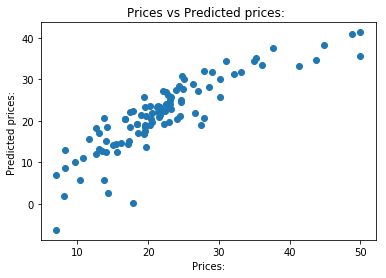

In [13]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, Y_train)

Y_pred = lm.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices:")
plt.ylabel("Predicted prices: ")
plt.title("Prices vs Predicted prices: ")

mse_lr = mean_squared_error(Y_test, Y_pred)
print(mse_lr)

In [14]:
mse_lr = mean_squared_error(Y_test, Y_pred)
print(mse_lr)

20.86929218377082


# **SKLearn SGDRegressor**

MSE 21.05326679398608



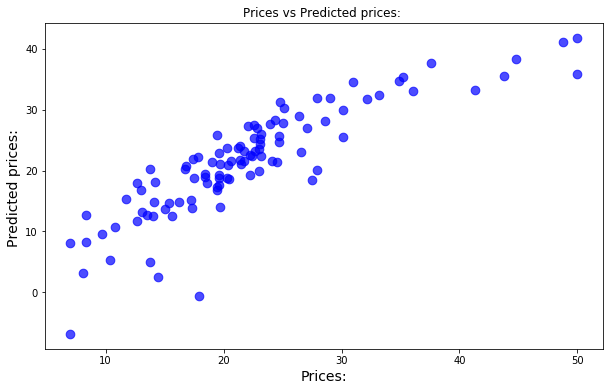

In [15]:
sgdRegressor = SGDRegressor(penalty='l2',)
sgdRegressor.fit(X_train,Y_train)

predicted_sgd =  sgdRegressor.predict(X_test)

print("MSE",mean_squared_error(Y_test, predicted_sgd))


print()
plt.figure(figsize=(10,6))
plt.rc('axes', labelsize=14) 
plt.scatter(Y_test,predicted_sgd,s=75,color="blue",alpha=0.7)
plt.xlabel("Prices:")
plt.ylabel("Predicted prices: ")
plt.title("Prices vs Predicted prices: ")
plt.show()
print()
print()

In [16]:
mse_sgd = mean_squared_error(Y_test, predicted_sgd)
print(mse_sgd)

21.05326679398608


In [17]:
print (sgdRegressor.coef_)

[-1.10812782  1.05016701 -0.3214819   0.7393729  -1.71084504  2.45712183
 -0.03471135 -2.98742943  2.30374108 -1.34567607 -2.07921816  1.05875575
 -4.18980498]


# **Implemented SGD**

In [0]:
#https://www.kaggle.com/tentotheminus9/linear-regression-from-scratch-gradient-descent
#https://www.kdnuggets.com/2017/04/simple-understand-gradient-descent-algorithm.html

In [0]:
#GRADIENT DESCENT
#Example

'''alpha = 0.01 #Step size
iterations = 2000 #No. of iterations
m = Y.size #No. of data points
np.random.seed(123) #Set the seed
theta = np.random.rand(13) #Pick some random values to start with


#GRADIENT DESCENT
def gradient_descent(X, Y, theta, iterations, alpha):
    past_costs = []
    past_thetas = [theta]
    for i in range(iterations):
        prediction = np.dot(X, theta)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)
        past_costs.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(X.T, error))
        past_thetas.append(theta)
        
    return past_thetas, past_costs

#Pass the relevant variables to the function and get the new values back...
past_thetas, past_costs = gradient_descent(X, Y, theta, iterations, alpha)
theta = past_thetas[-1]

#Print the results...
print("Gradient Descent: {:.2f}, {:.2f}".format(theta[0], theta[1]))'''

Gradient Descent: nan, nan


In [0]:
'''for i in range(n_iterations):
  gradients = 2/m * X_train1.T.dot(X_train1.dot(theta) - Y_train.reshape(-1,1))
  if np.linalg.norm(X_train1) < tol:
    break
  theta = theta - (eta * gradients)
print(gradients)'''

In [0]:
'''%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 120
import matplotlib.pyplot as plt
import numpy as np

def train(batch_size, lr, epochs, period):
    assert period >= batch_size and period % batch_size == 0
    w, b = init_params()
    total_loss = [np.mean(square_loss(net(X, w, b), y).asnumpy())]
    # Epoch starts from 1.
    for epoch in range(1, epochs + 1):
        # Decay learning rate.
        if epoch > 2:
            lr *= 0.1
        for batch_i, data, label in data_iter(batch_size):
            with autograd.record():
                output = net(data, w, b)
                loss = square_loss(output, label)
            loss.backward()
            sgd([w, b], lr, batch_size)
            if batch_i * batch_size % period == 0:
                total_loss.append(
                    np.mean(square_loss(net(X, w, b), y).asnumpy()))
        print("Batch size %d, Learning rate %f, Epoch %d, loss %.4e" %
              (batch_size, lr, epoch, total_loss[-1]))
    print('w:', np.reshape(w.asnumpy(), (1, -1)),
          'b:', b.asnumpy()[0], '\n')
    x_axis = np.linspace(0, epochs, len(total_loss), endpoint=True)
    plt.semilogy(x_axis, total_loss)
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.show()''''''

Batch size 1, Learning rate 0.200000, Epoch 1, loss 8.4869e-05
Batch size 1, Learning rate 0.200000, Epoch 2, loss 5.1585e-05
Batch size 1, Learning rate 0.020000, Epoch 3, loss 4.8704e-05
w: [[ 2.001223 -3.40109 ]] b: 4.2015486 



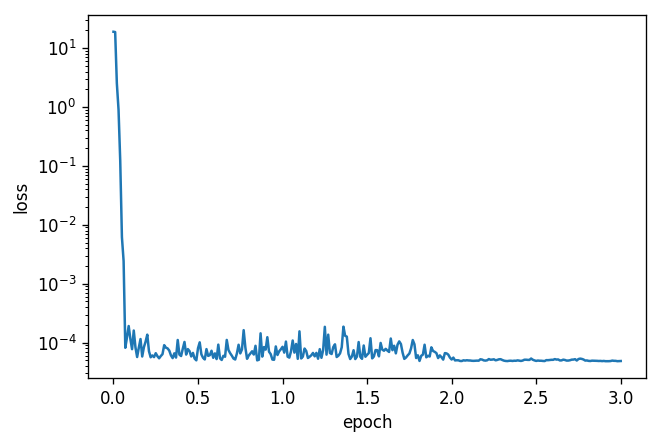

In [0]:
#train(batch_size=1, lr=0.2, epochs=3, period=10)

In [0]:
#https://stackoverflow.com/questions/48843721/python-gd-and-sgd-implementation-on-linear-regression

In [0]:
#https://stackoverflow.com/questions/49865952/implementing-gradient-descent-in-python-and-receiving-an-overflow-error

In [0]:
#Initialising values
W=np.zeros(shape=(1,13))
B=0
step=500
lr=0.01
n=40


while step>=0:
    w,b,vec_cal,int_cal=W,B,np.zeros(shape=(1,13)),0
    #Taking sample
    batch=df.sample(40) 
    p=np.array(batch.drop('price',axis=1))
    q=np.array(batch['price'])
    #Gradient function calculation as of formula
    for i in range(n):
        vec_cal+=(-2)*p[i]*(q[i]-(np.dot(w,p[i])+b))
        int_cal+=(-2)*(q[i]-(np.dot(w,p[i])+b))
        
    W=(w-lr*(vec_cal)/n)
    B=(b-lr*(int_cal)/n)
    
    step-=1
   

In [95]:
print(W)
print(B)

[[-0.91164295  0.829762   -0.38271736  0.77480466 -1.33841202  2.53801258
  -0.14505936 -2.73783934  1.77572633 -0.71655839 -1.92644488  0.97063177
  -4.21214335]]
[22.54369796]


In [0]:
y_pred=[]
for i in range(len(X_test)):
    der=np.dot(W,X_test[i])+B  
    y_pred.append(np.asscalar(der))

In [92]:
MSE_ms=mean_squared_error(Y_test,y_pred)
print('mean squared error =',MSE_ms)


mean squared error = 20.523230432385088


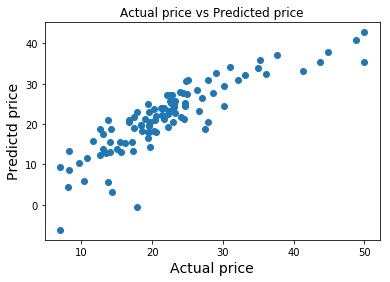

In [51]:
# plot of actual price vs predicted price from manual SGD

plt.scatter(Y_test,y_pred)
plt.xlabel('Actual price')
plt.ylabel('Predictd price')
plt.title('Actual price vs Predicted price')
plt.show()

In [0]:
'''import numpy as np
import pandas as pd

#X = [0.5, 2.5]
#Y = [0.2, 0.9]

X = load_boston().data
Y = load_boston().target

def f(w, b, x): #sigmoid with parameter w,b
    return 1.0/(1.0 * np.exp(-(w * x + b)))


def error(w, b):
    err = 0.0
    for x, y in zip(X, Y):
        fx = f(w, b, x)
        err += 0.5 * (fx - y)**2
    return err

def grad_b(w, b, x, y):
    fx = f(w, b, x)
    return (fx - y) * fx * (1 - fx)

def grad_w(w, b, x, y):
    fx = f(w, b, x)
    return (fx - y) * fx * (1 - fx) * x

def do_gradient_descent():
    w, b, eta, max_epochs = 1, 1, 0.01, 100
    for i in range(max_epochs):
        dw, db = 0, 0
        for x, y in zip(X, Y):
            dw += grad_w(w, b, x, y)
            db += grad_b(w, b, x, y)
        w = w - eta * dw
        print(w)
        b = b - eta * db
        print(b)
    er = error(w, b)
    #print(er)
    return er
##Calling Gradient Descent function
do_gradient_descent()'''

In [0]:
#https://gluon.mxnet.io/chapter06_optimization/gd-sgd-scratch.html

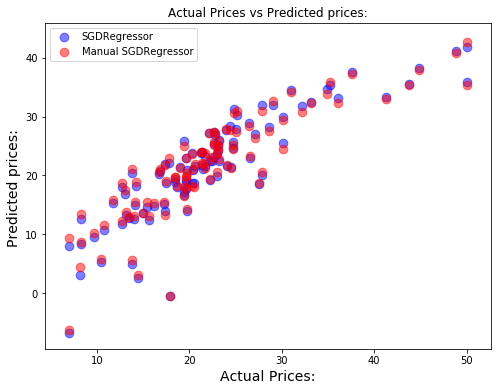

In [52]:

plt.figure(figsize=(8,6))
plt.rc('axes', labelsize=14) 
plt.scatter(Y_test, predicted_sgd,s=75,color="blue", alpha=0.5,label='SGDRegressor')
plt.scatter(Y_test, y_pred,s=75,color="red", alpha=0.5,label='Manual SGDRegressor')
plt.xlabel("Actual Prices:")
plt.ylabel("Predicted prices: ")
plt.title("Actual Prices vs Predicted prices:")
plt.legend(loc='upper left');
plt.show()
print()
print()

In [96]:
from prettytable import PrettyTable



p = PrettyTable()

p.field_names = ["Implementation", "MSE value",  ]

p.add_row(["Manual SGD", 20.523230432385088, ] )
p.add_row(["SKLEARN SGD",21.05326679398608 ])


# Printing the Table
print(p)

+----------------+--------------------+
| Implementation |     MSE value      |
+----------------+--------------------+
|   Manual SGD   | 20.523230432385088 |
|  SKLEARN SGD   | 21.05326679398608  |
+----------------+--------------------+


# **Conclusion:**

Implenetation of Linear regression done using SKlearn library. SGDRegressor was trained. Manual SGD regressor is applied with various modes. Derivative calcualtion is carried out in the model.
The points int the plot appear close .The MSE values are compared in oretty table and the values are more closer .
As the steps and sample  increased the MSE value is decreased